In [ ]:
import pandas as pd

# Đường dẫn tới file
file_path = r"archive\Tweets.csv"

# Đọc file CSV
df = pd.read_csv(file_path)

# Hiển thị thông tin cơ bản
print("📊 Kích thước dữ liệu:", df.shape)
print("\n📋 Các cột trong dataset:\n", df.columns.tolist())

# Xem 5 dòng đầu tiên
print("\n📌 5 dòng đầu tiên của dữ liệu:")
print(df.head())

# Kiểm tra dữ liệu thiếu (nếu có)
print("\n🔍 Số lượng giá trị thiếu trong mỗi cột:")
print(df.isnull().sum())


In [43]:
# Xác định danh sách các cột KHÔNG cần thiết cho NLP
cols_to_drop = [
    'tweet_id',
    'airline_sentiment_confidence',
    'negativereason_confidence',
    'retweet_count',
    'tweet_coord',
    'tweet_created',
    'tweet_location',
    'user_timezone',
    'name',
    'airline_sentiment_gold',
    'negativereason_gold'
]

# Tạo df_test bằng cách loại bỏ các cột đó
df_test = df.drop(columns=cols_to_drop, errors='ignore')

# Kiểm tra lại kết quả
print("\n✅ Các cột còn lại trong df_test:")
print(df_test.columns.tolist())

# Xem vài dòng đầu tiên
print("\n📌 5 dòng đầu tiên của df_test:")
df_test.head()


✅ Các cột còn lại trong df_test:
['airline_sentiment', 'negativereason', 'airline', 'text']

📌 5 dòng đầu tiên của df_test:


,airline_sentiment,negativereason,airline,text
0,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...


In [44]:
# df_test.to_excel("df_test.xlsx", index=False)

df_test.to_csv("df_test.csv", index=False)

In [40]:
df_test.shape

(14640, 4)

In [31]:
# Đếm số lượng từng loại sentiment
sentiment_counts = df_test['airline_sentiment'].value_counts()
sentiment_percent = df_test['airline_sentiment'].value_counts(normalize=True) * 100

print("Số lượng từng loại sentiment:\n", sentiment_counts)
print("\nTỉ lệ % từng loại sentiment:\n", sentiment_percent.round(2))


Số lượng từng loại sentiment:
 airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

Tỉ lệ % từng loại sentiment:
 airline_sentiment
negative    62.69
neutral     21.17
positive    16.14
Name: proportion, dtype: float64


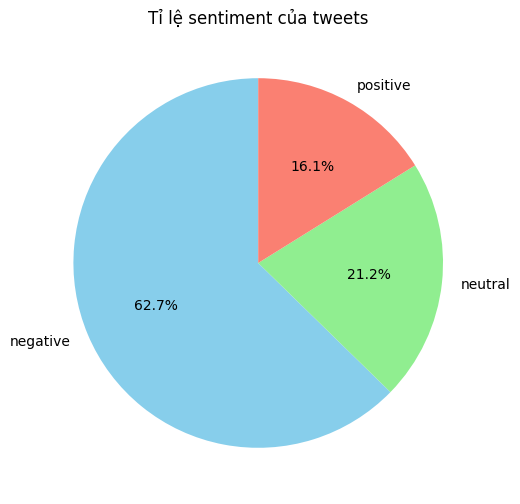

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue','lightgreen','salmon'])
plt.title('Tỉ lệ sentiment của tweets')
plt.show()


In [33]:
# Đếm số lượng từng hãng
airline_counts = df_test['airline'].value_counts()
airline_percent = df_test['airline'].value_counts(normalize=True) * 100

print("Số lượng từng hãng:\n", airline_counts)
print("\nTỉ lệ % từng hãng:\n", airline_percent.round(2))


Số lượng từng hãng:
 airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

Tỉ lệ % từng hãng:
 airline
United            26.11
US Airways        19.90
American          18.85
Southwest         16.53
Delta             15.18
Virgin America     3.44
Name: proportion, dtype: float64


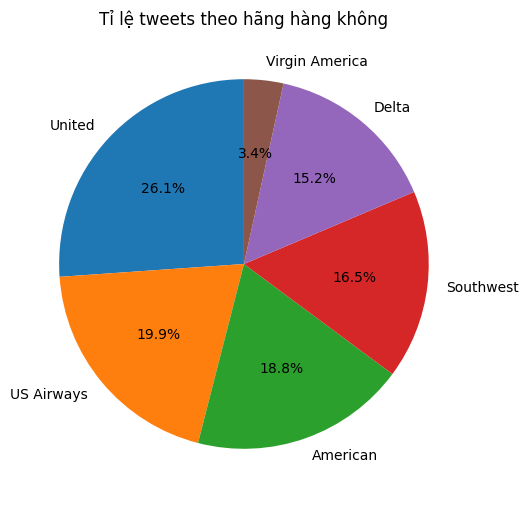

In [34]:
plt.figure(figsize=(6,6))
plt.pie(airline_counts, labels=airline_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Tỉ lệ tweets theo hãng hàng không')
plt.show()


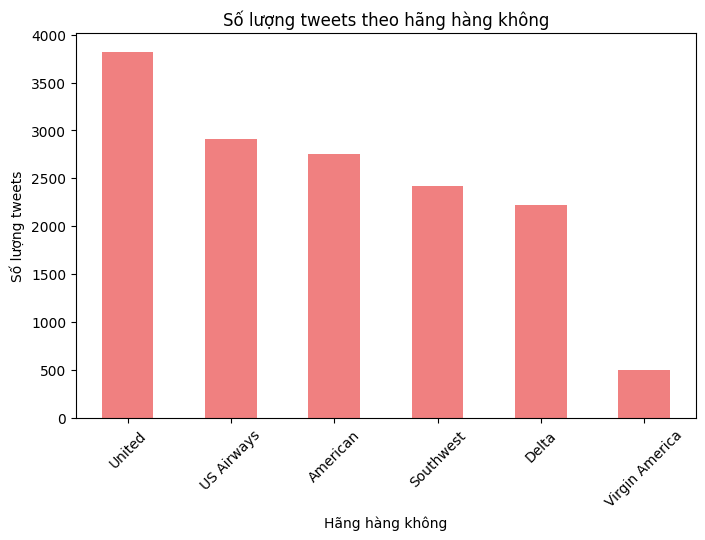

In [35]:
plt.figure(figsize=(8,5))
airline_counts.plot(kind='bar', color='lightcoral')
plt.title('Số lượng tweets theo hãng hàng không')
plt.ylabel('Số lượng tweets')
plt.xlabel('Hãng hàng không')
plt.xticks(rotation=45)
plt.show()


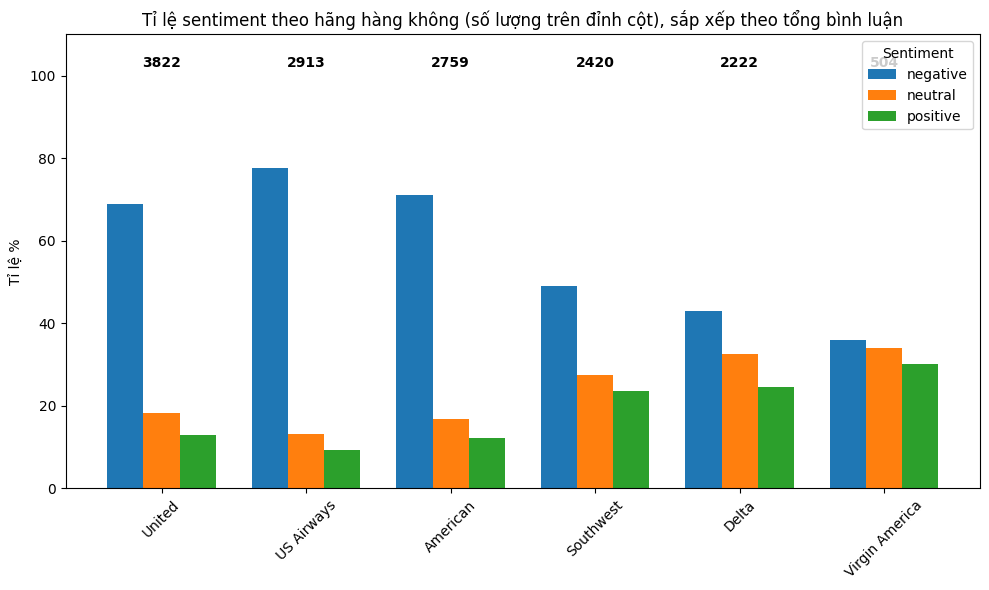

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Tạo bảng tổng hợp số lượng sentiment theo hãng
sentiment_airline = df_test.pivot_table(index='airline', 
                                        columns='airline_sentiment', 
                                        aggfunc='size', 
                                        fill_value=0)

# Sắp xếp theo tổng số bình luận giảm dần
sentiment_airline['total'] = sentiment_airline.sum(axis=1)
sentiment_airline = sentiment_airline.sort_values(by='total', ascending=False)
sentiment_airline_percent = sentiment_airline.drop(columns='total').div(sentiment_airline['total'], axis=0) * 100

# Vẽ biểu đồ cột nhóm
sentiments = sentiment_airline_percent.columns
airlines = sentiment_airline_percent.index
x = np.arange(len(airlines))  # vị trí của các hãng
width = 0.25  # chiều rộng cột

plt.figure(figsize=(10,6))

for i, sentiment in enumerate(sentiments):
    plt.bar(x + i*width, sentiment_airline_percent[sentiment], width, label=sentiment)

# Ghi số lượng tổng trên đỉnh mỗi nhóm cột
for i, airline in enumerate(airlines):
    total = sentiment_airline.loc[airline, 'total']
    plt.text(x[i] + width, 102, str(total), ha='center', fontweight='bold')

plt.xticks(x + width, airlines, rotation=45)
plt.ylabel('Tỉ lệ %')
plt.ylim(0, 110)
plt.title('Tỉ lệ sentiment theo hãng hàng không (số lượng trên đỉnh cột), sắp xếp theo tổng bình luận')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()
